In [74]:
from logging import raiseExceptions
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import os, time
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors



f = open('credentials.json')
dt = json.load(f)
scopes = ["https://www.googleapis.com/auth/youtube.force-ssl"]
client_id = dt['client_id']
client_secret = dt['client_secret']
mySpotifyPlaylist = []
# Disable OAuthlib's HTTPS verification when running locally.
# *DO NOT* leave this option enabled in production.
os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"
api_service_name = "youtube"
api_version = "v3"
client_secrets_file = "ytcredentials.json"
flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(
        client_secrets_file, scopes)
credentials = flow.run_console()
youtube = googleapiclient.discovery.build(
        api_service_name, api_version, credentials=credentials)

def createSongPlaylist():
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                            client_secret=client_secret))
    results = sp.playlist_tracks(playlist_id='https://open.spotify.com/playlist/75jaHyVgpJXlciQ9y7hmsr?si=503c99c2e4d54cc2')
    for i in range(len(results['items'])):
        cx = results['items'][i]['track']['artists'][0]['name']+" - "+results['items'][i]['track']['name']
        mySpotifyPlaylist.append(cx)
    return mySpotifyPlaylist

def createYtPlaylist(title):
    request = youtube.playlists().insert(
        part="contentDetails,id,localizations,snippet,status",
        body={
          "snippet": {
            "title": title,
            "description": "Music",
            "defaultLanguage": "EN"
          },
          "status": {
            "privacyStatus": "private"
          }
        }
    )
    response = request.execute()
    return response['id']
def searchOnYT(item):
    request = youtube.search().list(type='video',q=item,part='snippet', maxResults=10, order='relevance', regionCode="US")
    response = request.execute()
    return response['items'][0]['id']['videoId']

def addOnPlaylist(videoId, playlistId):

    request = youtube.playlistItems().insert(
        part="contentDetails,id,snippet,status",
        body={
          "snippet": {
            "playlistId": playlistId,
            "resourceId": {
              "kind" : "youtube#video",
              "videoId": videoId
            }
          }
        }
    )
    response = request.execute()
    return None


def main():
    ytPlId = "XXX"
    ytPltitle = "Mr. Blue Sky"
    

    pl = createSongPlaylist()
    newYtPlaylist = createYtPlaylist(ytPltitle)
    for i in pl:
      x = searchOnYT(i)
      addOnPlaylist(x,newYtPlaylist)
      time.sleep(3)
      print(i)

if __name__ == "__main__":
    main()
print('------ DONE ------')


TypeError: 'bool' object is not callable

In [111]:
from asyncore import write
import json

dt = {
    "president": {
        "name": "Zaphod Beeblebrox",

        "species": "Betelgeusian"
    }
}

with open('test.json','w') as writejs:
    json.dump(dt, writejs) 

with open('test.json', 'r') as readjs:
    rdt = json.load(readjs)
print(type(rdt))

<class 'dict'>


In [39]:
import json, requests
from urllib import response

reponse = requests.get('https://jsonplaceholder.typicode.com/todos')
todos = json.loads(reponse.text)

#print(todos)

In [3]:
def factorial(number):
     # Validate input
     if not isinstance(number, int):
         raise TypeError("Sorry. 'number' must be an integer.")
     if number < 0:
         raise ValueError("Sorry. 'number' must be zero or positive.")
     # Calculate the factorial of number
     def inner_factorial(number):
         if number <= 1:
             return 1
         return number * inner_factorial(number - 1)
     return inner_factorial(number)


factorial(6)

720

In [16]:
#testing encapsulation
import time
def first():
    data = bytes(b"KANA6")
    sok = ''
    def second(data,sok):
        if data == bytes(b'KANA6'):
            while data == bytes(b'KANA6'):
                work =  21
                time.sleep(0.02)
                sok='received'
                data = input("new data: ")
                data = bytes(b''+data.encode('ascii'))
                if data != bytes(b'KANA6'):
                    break
        return data,sok,work
    
    data,sok,work = second(data,sok)
    
    if data == bytes(b'CONTINUE'):
        work = 0
    return data,sok,work
first()


(b'CONTINUE', 'received', 0)

In [11]:
f = open(r'test.txt' , 'r') #open file
for x in f:
    x=x.rstrip()
    x = x.split(',')
    ip,name, pwd = x
    print(ip)
    print(name)
    print(pwd)



'192.168.0.1'
'sarah'
'privatepassword'
'192.168.20.2'
'john'
'password1'


In [63]:

def isPalindrome(x):
    y = str(x)
    y = y[::-1]
    if str(x) == y:
        return True
    else:
        return False
isPalindrome(121)

True

In [24]:
lst2 = {'IV':4,'IX':9,'XL':40,'XC':90,'CD':400,'CM':900}
lst1 = {'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000} 
check = [item for item in lst2]
check2 = [item for item in lst1]
empty=[]
cnt = 0


for j in range(len(lst2)):
    for x in check:
        if x in a :
            empty.append(x)
            m = list(a)
            for i in empty:
                v = a.find(i)
                del m[v:v+2]
                a=''.join(m)
                del empty[0]
                cnt+=lst2.get(i)
        indx = check.index(x)



for j in range(len(lst1)):
    for x in check2:
        if x in a :
            empty.append(x)
            m = list(a)
            for i in empty:
                v = a.find(i)
                del m[v]
                a=''.join(m)
                del empty[0]
                cnt+=lst1.get(i)
     

        
        
            
print(cnt)

MC so far!
1199


In [1]:
def romanToInt(s):
        map = {"I":1,"V":5,"X":10,"L":50,"C":100,"D":500,"M":1000}
        ans = 0
        for i in range(len(s)):
            if i == len(s)-1:
                ans += map[s[i]]
            elif map[s[i+1]] > map[s[i]]:
                
                ans -= map[s[i]]
            else:
                ans += map[s[i]]
        return ans
romanToInt('VIII')

8

In [3]:
def romanToInt(s):
        map = {"I":1,"V":5,"X":10,"L":50,"C":100,"D":500,"M":1000}
        ans = 0
        for i in range(len(s)):
            if i == len(s)-1:
                ans += map[s[i]]
            elif map[s[i+1]] > map[s[i]]:
                
                ans -= map[s[i]]
            else:
                ans += map[s[i]]
        return ans
romanToInt('XVIII')

18

In [95]:
def longestCommonPrefix(strs):
    empty =[]
    res =[]
    for a in strs:
        for b in a:
            if all(b in i for i in strs):
                empty.append(b)
                ty=''.join(empty)
                #print(ty)
                if all(ty in x for x in strs) and all(y.index(ty) == 0 for y in strs)and ty not in res:
                    res=[]
                    res.append(ty)
    res=''.join(res)
    return res
print(longestCommonPrefix(["cir","car"]))
print(longestCommonPrefix(["flower","flow","flight"]))
print(longestCommonPrefix(["reflower","flow","flight"]))
print(longestCommonPrefix(["aa","aa"]))

c
fl

aa


In [103]:
def longestCommonPrefix(strs):
    word = ""
    for i in range(len(strs[0])):
        for s in strs:
            if(i==len(s) or s[i]!=strs[0][i]):
                return word
        word+=strs[0][i]
    return word
print(longestCommonPrefix(["cir","car"]))
print(longestCommonPrefix(["flower","flow","flight"]))
print(longestCommonPrefix(["reflower","flow","flight"]))
print(longestCommonPrefix(["aa","aa"]))

c
fl

aa


In [112]:
def isValid(s):
    a = "()" 
    b = '{}'
    c = '[]'
    d = [a,b,c]
    
    for i in range(len(s)):
        if i%2 == 0 and ''.join(s[i:i+2]) not in d:
            return False
        elif i%2!= 0 and ''.join(s[i:i+2]) in d:
            return True
        else:
            return True
            

print(isValid("()"))
print(isValid("()[]{}"))
print(isValid("(]"))
print(isValid("{[]}"))

True
True
False
False


In [244]:
def mergeTwoLists(list1, list2):
    for i in list2:
        if i != '':
            list1.append(i)
    return sorted(list1)
mergeTwoLists([1,2,4],[1,3,4])

[1, 1, 2, 3, 4, 4]

In [251]:
def plusOne(digits):
    digits=[str(i) for i in digits]
    digits=str(int(''.join(digits))+1)
    digits=[i for i in digits]
    return digits
print(plusOne([1,2,3]))
print(plusOne([4,3,2,1]))
print(plusOne([9]))


['1', '2', '4']
['4', '3', '2', '2']
['1', '0']


In [278]:
def containsDuplicate(nums):
    if len(nums)!= len(set(nums)):
        return True
    return False
print(containsDuplicate([5,1,2,3,1]))
print(containsDuplicate([1,2,3,4]))
print(containsDuplicate([5,9,1,1,1,3,3,4,3,2,4,2]))

True
False
True


In [295]:
nums=[2,1]
nums.sort(reverse=True)
nums=set(nums)
if len(nums) > 2:
    print(nums[2])
else:
    print(max(nums))#

2


In [403]:
def findWords(words):
    row1 = ['q','w','e','r','t','y','u','i','o','p']
    row2 = ['a','s','d','f','g','h','j','k','l']
    row3 = ['z','x','c','v','b','n','m']
    words2 = [] 
    words3 = []

    for x in words:
        for i in range(len(x)):
            if x[i].lower() in row1:
                x=x.replace(x[i],'1')
            if x[i].lower() in row2:
                x=x.replace(x[i],'2')
            if x[i].lower() in row3:
                x=x.replace(x[i],'3')
                print(x,x[i])
        words2.append(x)

    words2 = [set(i) for i in words2]

    for i in range(len(words)):
        if len(words2[i]) == 1:
            words3.append(words[i])
    
    return words3

findWords(["adsdf","sfd"])

['adsdf', 'sfd']

In [423]:
def findRelativeRanks(score):
    holder = []
    score = list(score)
    st= score.index(max(score))
    print(score[st])
    score[st] = 'Gold Medal'

    ndList = score[:st]+score[st+1:]
    nd = max(ndList)
    if nd in score:
        score[score.index(nd)] = 'Silver Medal'
    
    for i in score:
        if isinstance(i,int):
            holder.append(i)
    print(holder,'holder')
    rd = max(holder)
    print(rd,'third rank')
    if rd in score:
        score[score.index(rd)] = 'Bronze Medal'
    #nd= score.index(max(score))
    #score[nd] = “Silver Medal”

    #rd= score.index(max(score))
    #score[rd] = “Bronze Medal”

    
    return score
print(findRelativeRanks([5,4,3,2,1]))
print(findRelativeRanks([10,3,8,9,4]))
#print(findRelativeRanks())
#print(findRelativeRanks())


5
[3, 2, 1] holder
3 third rank
['Gold Medal', 'Silver Medal', 'Bronze Medal', 2, 1]
10
[3, 8, 4] holder
8 third rank
['Gold Medal', 3, 'Bronze Medal', 'Silver Medal', 4]


In [473]:
#def findRelativeRanks(score):
score = [10,3,8,9,4]
rank = [str(sorted(score, reverse=True).index(x)+1) for x in score ]
for i in rank:
    if i == '1':
        rank[rank.index(i)] = 'Gold Medal'
    if i == '2':
        rank[rank.index(i)] = 'Silver Medal'
    if i == '3':
        rank[rank.index(i)] = 'Bronze Medal'
        

print(rank)

['Gold Medal', '5', 'Bronze Medal', 'Silver Medal', '4']


In [486]:
score = [10,3,8,9,4]
rank = []
for i in score:
    x=str(sorted(score,reverse=True).index(i)+1)
    if x == '1':
        x='Gold Medal'
    elif x=='2':
        x='Silver Medal'
    elif x=='3':
        x='Bronze Medal'
    rank.append(x)
print(rank)

['Gold Medal', '5', 'Bronze Medal', 'Silver Medal', '4']


In [32]:
def permute(nums):
    if len(nums) == 0:
        return []
    if len(nums) == 1:
        return [nums]
    holder = []
    for i in range(len(nums)):
        x = nums[i]
        remList = nums[:i] + nums[i+1:]

        for j in permute(remList):
            holder.append([x]+j)
            

    return holder
            
        
permute([1,2,3])

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

In [97]:
def ranDom(nums):

    if len(nums)==0:
        return []
    if len(nums)==1:
        return [nums]
    


    holder = []
    for i in range(len(nums)):
        x = nums[i]
        remaining = nums[:i]+nums[i+1:]
        
        for j in ranDom(remaining):
            holder.append([x]+j)
    return holder
ranDom([1,2,3])

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

In [ ]:
def majorityElement(nums):
    for i in nums:
        if i 
majorityElement([2,2,1,1,1,2,2])

In [50]:
nums = [3,3,4]
#nums = [str(i) for i in nums]
holder = set(nums)
higherCount = 0
ans = 0
for i in holder:
    x=nums.count(i)
    print('num:',i,'count:',x)
    if x>higherCount:
        higherCount=x
        ans = i

print(ans)

num: 3 count: 2
num: 4 count: 1
3


In [86]:
def isPalindrome():
    s="A man, a plan, a canal: Panama"
    s = (''.join(filter(str.isalnum, s))).lower()
   
    
    if s == s[::-1]:
        return True
    else:
        return False

isPalindrome()

amanaplanacanalpanama


True

In [ ]:
def isHappy(n):
    

In [110]:
dejavu = []
def isHappy(n):
    global dejavu
    x=[int(i) for i in str(n)]

    toTal = sum([x[i]**2 for i in range(len(x))])
    #print(toTal)
    if toTal in dejavu:
        print(dejavu)
        print(False)
        return
    if toTal == 1:
        print(True)
    else:
        dejavu.append(toTal)
        isHappy(toTal)
isHappy(2)

[4, 16, 37, 58, 89, 145, 42, 20]
False


In [149]:
class Solution:
    def __init__(self):
        self.dejavu = []
    def isHappy(self, n: int) -> bool:
        
        x=[int(i) for i in str(n)]
        toTal = sum([x[i]**2 for i in range(len(x))])

        if toTal in self.dejavu:
            return False
        
        if toTal == 1:
            return True
        
        else:
            self.dejavu.append(toTal)
            return self.isHappy(toTal)
st = Solution()
st.isHappy(30)

False

In [150]:
class Solution:
    def __init__(self):
        self.seen = []
    
    def isHappy(self, n: int) -> bool:
        
        if n in self.seen: return False 
        self.seen.append(n) 
    
        if n == 1 : 
            return True 
        else: 
            tmp = 0 
            while n: 
                tmp += (n % 10)**2
                n = n//10
            return self.isHappy(tmp)
st = Solution()
st.isHappy(30)

False

In [160]:
def missingNumber(nums):
    #s = len(nums)
    #holder = list(range(s+1))
    for i in range(len(nums)+1):
        if i not in nums:
            return i
    
print(missingNumber([3,0,1]))
print(missingNumber([0,1]))
print(missingNumber([9,6,4,2,3,5,7,0,1]))
print(missingNumber([1]))

2
2
8
0


In [164]:
def strStr(haystack,needle):
    if not needle:
        return 0
    s=haystack.find('p')
    return s
strStr('hello','ll')

-1

In [353]:
def reverseWords(s):
    return ' '.join([i[::-1] for i in s.split(' ') ])
reverseWords("Let's take LeetCode contest")

"s'teL ekat edoCteeL tsetnoc"

In [197]:
s = "God Ding"
#s = "Let's take LeetCode contest"
x=''
for i in s.split(' '):
    i=i[::-1]
    x+= (i+' ')
print(x)

doG gniD 


In [203]:
s = "God Ding"
w = ' '.join([i[::-1] for i in s.split(' ') ])
print(w)

doG gniD


In [260]:
def findComplement(num):

    x=format(num,'b')
    res = ''.join(['1' if x[i]=='0' else '0' for i in range(len(x)) ])
    res = int(res,2)
    return res
print(findComplement(10))
print(findComplement(127))
print(findComplement(5))
print(findComplement(12))
print(findComplement(1))
print(findComplement(0))
print(findComplement(27))

5
0
2
3
0
1
4


In [305]:
def findTheDifference(s,t):
    t = list(t)
    s= list(s)
    for i in s:
        if i in t:
            del t[t.index(i)]
    if t==[]:
        return None
    return ''.join(t)
    
print(findTheDifference('abcd','abcde'))
print(findTheDifference('a','aa'))
print(findTheDifference('',''))

e
a
None


In [319]:
def moveZeroes(nums):
    x= nums.count(0)
    nums = list(filter(lambda n: n!=0, nums))
    for i in range(x):
        nums.append(0)
    return nums

print(moveZeroes([0,1,0,3,12]))
print(moveZeroes([0]))

[1, 3, 12, 0, 0]
[0]


In [331]:
def moveZeroes(nums):
    for i in nums:
        if i == 0:
            nums.remove(i)
            nums.insert(i,len(nums))
    return nums
print(moveZeroes([0,1,0,3,12]))
print(moveZeroes([0]))

[4, 4, 1, 3, 12]
[0]


In [314]:
def addDigits(num):
    res = sum([int(i) for i in list(str(num))])
    if res >9:
        return addDigits(res)
    return res
addDigits(15987098745256287942675982467589269784534657823)

2

In [315]:
def reverseBits(n):
    x = int( '{:032b}'.format(n)[::-1],2)
    return x

In [447]:
def fib(p):
    a,b,x = 1,1,0
    n = 0
    if p == 0:
        return 0
    while True:
        a = x 
        x += b
        b = a
        n+= 1
        if n >= p:
            return x
fib(110)

Fibonacci Sequence: 


43566776258854844738105

In [454]:
def hammingWeight(n):
    x= '{:032b}'.format(n)
    return str(x).count('1')


In [460]:
def canConstruct(ransomNote,magazine):
    if ransomNote in magazine:
        return True
    return False
print(canConstruct('aa','aab'))
print(canConstruct('a','b'))
print(canConstruct('aa','ab'))
print(canConstruct('aa','babab'))
print(canConstruct('axe','exa'))

True
False
False
False
False


In [488]:
def canConstruct(ransomNote,magazine):
    ransomNote = list(ransomNote)
    magazine = list(magazine)
    for i in ransomNote:
        if i in magazine:
            ransomNote[ransomNote.index(i)] = ''
            magazine.remove(i)
    x=''.join(ransomNote)
    if x == '':
        return True
    return False
print(canConstruct('aa','aab'))
print(canConstruct('a','b'))
print(canConstruct('aa','ab'))
print(canConstruct('aa','babab'))
print(canConstruct('',''))
print('-----------------------------')
print(canConstruct('a;',';a'))
print(canConstruct('QSas','qsas'))
print(canConstruct('1w','w1'))
print(canConstruct('bollock','bllck'))
print(canConstruct('a','exa'))

True
False
False
True
True
-----------------------------
True
False
True
False
True


In [517]:
def countBits(n):
    return [(format(i,'b')).count('1') for i in range(n+1)] 
print(countBits(2))
print(countBits(5))
print(countBits(0))
print(countBits(1))


[0, 1, 1]
[0, 1, 1, 2, 1, 2]
[0]
[0, 1]


In [ ]:
def moveZeroes(nums):
    x= nums.count(0)
    nums = list(filter(lambda n: n!=0, nums))
    for i in range(x):
        nums.append(0)
    return nums

print(moveZeroes([0,1,0,3,12]))
print(moveZeroes([0]))

In [29]:

def reverseString(s):
    """
    Do not return anything, modify s in-place instead.
    """
    for i in range(len(s))[::-1]:
        v = s.pop(i)
        s.append(v)
    return s #Do Not Return in the actual coding challenge
print(reverseString(["h","e","l","l","o"]))
print(reverseString(["H","a","n","n","a","h"]))

['o', 'l', 'l', 'e', 'h']
['h', 'a', 'n', 'n', 'a', 'H']


In [33]:
# Python One Liner but double bracketed
def reverseString(s):
    s.append([s.pop(i) for i in range(len(s))[::-1]])
    return s
print(reverseString(["h","e","l","l","o"]))
print(reverseString(["H","a","n","n","a","h"]))

[['o', 'l', 'l', 'e', 'h']]
[['h', 'a', 'n', 'n', 'a', 'H']]


In [30]:
# A much more interesting way found on geek for geeks
def reverseString(s):
    for i in range(0, int(len(s)/2)):
        s[i], s[len(s) - i -1] = s[len(s) -i -1], s[i]
    return s
print(reverseString(["h","e","l","l","o"]))
print(reverseString(["H","a","n","n","a","h"]))

['o', 'l', 'l', 'e', 'h']
['h', 'a', 'n', 'n', 'a', 'H']


In [49]:
def wordPattern():
    pattern = "abba"
    pattern = list(pattern)
    print(pattern)
    s = "dog fish dog fish"
    s = s.split()
    print(s)
    x = set(s)
    print(x,'This is the set')
    
    x = dict(zip(pattern,s))
    return x
wordPattern()

['a', 'b', 'b', 'a']
['dog', 'fish', 'dog', 'fish']
{'dog', 'fish'} This is the set


{'a': 'fish', 'b': 'dog'}

In [97]:
#def wordPattern():
pattern = "abba"
s = "dog cat dog cat dog aba"

x = list(pattern)
y = s.split()

setS = list(set(y))
print(setS)
setOfPattern = list(set(x))

for i in range(len(setOfPattern)):
    for j in x:
        if j == setOfPattern[i]:
            x[x.index(j)] = i
for i in range(len(setS)):
    for j in y:
        if j == setS[i]:
            y[y.index(j)] = i
print(x)
print(y)
if x == y:
    print(True)
else:
    print(False)
#    if setOfPattern[i] in x:
#        x[x.index(setOfPattern[i])] = i
#    print(x)

['cat', 'dog', 'aba']
[0, 1, 1, 0]
[1, 0, 1, 0, 1, 2]
False


In [234]:
def wordPattern(pattern, s):
    x = list(pattern)
    y = s.split()

    setOfPattern = []
    [setOfPattern.append(i) for i in x if i not in setOfPattern]
    setOfS = []
    [setOfS.append(i) for i in y if i not in setOfS]

    for i in setOfPattern:
        for j in range(len(x)):
            if x[j] == i:
                x[j] = setOfPattern.index(i)
    for i in setOfS:
        for j in range(len(y)):
            if y[j] == i:
                y[j] = setOfS.index(i)

    if x== y:
        return True
    else:
        return False
print(wordPattern('baba','cat dog cat dog'))
print(wordPattern('lol','cat dog dog'))
print(wordPattern('aaaa','cat car cat cat'))
print(wordPattern('bbb','catcat cat'))
print(wordPattern('1190','cat cat dog elf'))
print(wordPattern('b a','golf racket'))
print(wordPattern('b ','cat'))
print(wordPattern('b ','cat cat'))

True
False
False
False
True
False
False
False


In [232]:
def wordPattern(p,s):
    words, w_to_p = s.split(' '), dict()

    if len(p) != len(words): return False
    if len(set(p)) != len(set(words)): return False # for the case w = ['dog', 'cat'] and p = 'aa'

    for i in range(len(words)):
        if words[i] not in w_to_p: 
            w_to_p[words[i]] = p[i]
        elif w_to_p[words[i]] != p[i]: 
            return False

    return True
print(wordPattern('baba','cat dog cat dog'))
print(wordPattern('lol','cat dog dog'))
print(wordPattern('aaaa','cat car cat cat'))
print(wordPattern('bbb','catcat cat'))
print(wordPattern('1190','cat cat dog elf'))
print(wordPattern('b a','golf racket'))
print(wordPattern('b ','cat'))
print(wordPattern('b ','cat cat'))


True
False
False
False
True
False
False
False


In [272]:
def longestPalindrome(s): # misunderstood the topic but its still intersting to keep the code
    v = len(s)+1
    for i in range(len(s)):
        subList = s[:i]
        print(subList)
        print(s[:i][::-1])
        if subList == s[i:i+len(subList)]:
            print(subList)
longestPalindrome("abccccdd")




a
a
ab
ba
abc
cba
abcc
ccba
abccc
cccba
abcccc
ccccba
abccccd
dccccba


In [294]:
s="ccccddesooeeeggtuiv"
s= list(s)
pairedStrings = []
nonPaired = []
for i in s:
    v= s.count(i)
    if v == 1 :
        nonPaired.append(i)
    elif v % 2 == 0 and i not in pairedStrings:
        w = int(v/2)
        for j in range(w):
            pairedStrings.append(i)
    elif v > 1 and v % 2 != 0 and i not in pairedStrings:
        nonPaired.append(i)
        v-=1
        vv= int(v/2)
        for k in range(vv):
            pairedStrings.append(i)

if len(nonPaired)>=1:
    print(len(''.join(pairedStrings+pairedStrings[::-1]))+1)
else:
    print(len(''.join(pairedStrings+pairedStrings[::-1])))

15


In [295]:
def longestPalindrome(s):
    s= list(s)
    pairedStrings = []
    nonPaired = []
    for i in s:
        v= s.count(i)
        if v == 1 :
            nonPaired.append(i)
        elif v % 2 == 0 and i not in pairedStrings:
            w = int(v/2)
            for j in range(w):
                pairedStrings.append(i)
        elif v > 1 and v % 2 != 0 and i not in pairedStrings:
            nonPaired.append(i)
            v-=1
            vv= int(v/2)
            for k in range(vv):
                pairedStrings.append(i)

    if len(nonPaired)>=1:
        return len(''.join(pairedStrings+pairedStrings[::-1]))+1
    else:
        return len(''.join(pairedStrings+pairedStrings[::-1]))

print(longestPalindrome('abccccdd'))
print(longestPalindrome('a'))
print(longestPalindrome('bb'))
print(longestPalindrome('dsafdafeadsfadsafa'))
print(longestPalindrome('asdfasfdsaferyiuquoyiefbakdshagyiuftrwgysafbdkysgiuvsbk'))
print(longestPalindrome('yyy'))
print(longestPalindrome('opopAAPOa'))
print(longestPalindrome('sdAADWPOAaaaqwd'))

7
1
2
17
45
3
7
7


In [297]:
def findDisappearedNumbers(nums):
    numSet = set(nums)
    res = [i for i in range(1,len(nums)+1) if i not in numSet]
    return res
print(findDisappearedNumbers([4,3,2,7,8,2,3,1]))
print(findDisappearedNumbers([1,1]))
print(findDisappearedNumbers([1]))
print(findDisappearedNumbers([1,9,2,3,5,6,6,7,8]))
print(findDisappearedNumbers([1,1,1]))

[5, 6]
[2]
[]
[4]
[2, 3]


In [260]:
def findDisappearedNumbers(nums):
    return (list(set(list(range(1,len(nums)+1))) - set(nums)))
print(findDisappearedNumbers([4,3,2,7,8,2,3,1]))
print(findDisappearedNumbers([1,1]))
print(findDisappearedNumbers([1]))
print(findDisappearedNumbers([1,9,2,3,5,6,6,7,8]))
print(findDisappearedNumbers([1,1,1]))

[5, 6]
[2]
[]
[4]
[2, 3]


In [307]:
def detectCapitalUse(word):
    x= list(word)
    if word.isupper() or word.islower() or (x[0].isupper and ''.join(x[1:]).islower()):
        return True
    else:
        return False
print(detectCapitalUse('FlaG'))
print(detectCapitalUse('USA'))
print(detectCapitalUse("Mona"))
print(detectCapitalUse('MOnA'))
print(detectCapitalUse('MONA'))
print(detectCapitalUse('mona'))
print(detectCapitalUse('sdfggteruysgdfhgjkAVGDGJQYWDJVWAAdgsdfg'))
print(detectCapitalUse('serguygfsbTJAVVDFS8865656788AGJDVJAVJH'))

False
True
True
False
True
True
False
False


In [128]:
def fizzBuzz(n):
    x = list(range(1,n+1))
    for i in x:
        if i%3==0 and i%5==0:
            x[x.index(i)] = 'FizzBuzz'
        elif i%3==0:
            x[x.index(i)] = 'Fizz'
        elif i%5==0:
            x[x.index(i)] = 'Buzz'
        else:
            x[x.index(i)] = str(i)
    return x
print(fizzBuzz(10))

['1', '2', 'Fizz', '4', 'Buzz', 'Fizz', '7', '8', 'Fizz', 'Buzz']


In [129]:

def fizzBuzz(n):
    res = list(map(str, range(1, n+1)))
    res[2::3] = ["Fizz"] * (n // 3)
    res[4::5] = ["Buzz"] * (n // 5)
    res[14::15] = ["FizzBuzz"] * (n // 15)
    return res
print(fizzBuzz(14))


['1', '2', 'Fizz', '4', 'Buzz', 'Fizz', '7', '8', 'Fizz', 'Buzz', '11', 'Fizz', '13', '14']


In [40]:
import time
start_time = time.time()

randList = ['a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e']
res = []
for i in (range(len(randList))): 
    rem = randList[:i]+randList[i+1:] 
    x=randList[i]
    for j in rem:
        x+=j
    res.append(x)
#print(res,'\n')
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.05450105667114258 seconds ---


In [39]:
#the above O(n^2) quadratic complexity is simplified to a O(n) here
# the O(n) code below is 10 times faster than the above solution
import time
start_time = time.time()



randList = ['a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e','a','b','c','d','e']
y=[]
for i in range(len(randList)):
    x = randList[i]+''.join(randList[:i]+randList[i+1:])
    y.append(x)
#print(y)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0048980712890625 seconds ---


In [82]:
import time
start_time = time.time()
def uniqueMorseRepresentations(words):
    morse = [".-","-...","-.-.","-..",".","..-.","--.","....","..",".---","-.-",".-..","--","-.","---",".--.","--.-",".-.","...","-","..-","...-",".--","-..-","-.--","--.."]
    alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    res = []
    for word in words:
        morseCode = ''
        for i in word:
            morseCode+=(morse[alphabet.index(i)])

        if morseCode not in res:
            res.append(morseCode)
    return len(res)
print(uniqueMorseRepresentations(["gin","zen","gig","msg"]))
print(uniqueMorseRepresentations(['a']))
print(uniqueMorseRepresentations(['sdfads','adfssd','asdfsde']))
print(uniqueMorseRepresentations(['adf','qer','ytu','asdf']))
print(uniqueMorseRepresentations(['asd','asdf','asdf','asd']))
print("--- %s seconds ---" % (time.time() - start_time))

2
1
3
4
2
--- 0.0009009838104248047 seconds ---


In [177]:
import time
start_time = time.time()
def numJewelsInStones(jewels, stones):
    cnt=0
    for i in jewels:
        cnt+= stones.count(i)
    return cnt
print(numJewelsInStones('aA','aAAbbbb'))
print(numJewelsInStones('s','SSs'))
print(numJewelsInStones('asdfadfweazdxvgseryiuqoiuIewrfdbjkfa','ADVGJKTYUHGKAZYUTIVKJGTYIJ'))
print(numJewelsInStones('sffg','sdfg'))
print(numJewelsInStones('aefpomscxvbne','asdfewa'))
print("--- %s seconds ---" % (time.time() - start_time))

3
1
2
4
6
--- 0.005188703536987305 seconds ---


In [179]:
import time
start_time = time.time()
def numJewelsInStones(jewels, stones):
    return len(list(filter(lambda n: n in jewels,stones)))
print(numJewelsInStones('aA','aAAbbbb'))
print(numJewelsInStones('s','SSs'))
print(numJewelsInStones('asdfadfweazdxvgseryiuqoIiuewrfdbjkfa','ADVGJKTYUHGKAZYUTIVKJGTYIJ'))
print(numJewelsInStones('sffg','sdfg'))
print(numJewelsInStones('aefpomscxvbne','asdfewaa'))
print("--- %s seconds ---" % (time.time() - start_time))

3
1
2
3
6
--- 0.0035300254821777344 seconds ---


In [127]:
import time
start_time = time.time()
def selfDividingNumbers(left, right):
    x = list(filter(lambda n: '0' not in str(n) ,range(left,right+1)))
    # x= range(left,right+1)
    # for i in x: if '0' str(i): skip
    res = []
    for i in x:
        j = list(str(i))
        y = list(map(lambda n: i%int(n) , j))
        if max(y) == 0:
           res.append(i)
    return res
print(selfDividingNumbers(47, 85))
print(selfDividingNumbers(1,22))
print(selfDividingNumbers(1,100))
print(selfDividingNumbers(101, 106))
print(selfDividingNumbers(22, 89))
print(selfDividingNumbers(1000,1121))
print("--- %s seconds ---" % (time.time() - start_time))

[48, 55, 66, 77]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 15, 22]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 15, 22, 24, 33, 36, 44, 48, 55, 66, 77, 88, 99]
[]
[22, 24, 33, 36, 44, 48, 55, 66, 77, 88]
[1111, 1112, 1113, 1115, 1116]
--- 0.00768280029296875 seconds ---


In [260]:
# this code is 3x faster than the one above.
# both the map and the filter above seem to require a lot of operations and high probably time 
# So they I try to avoid them as much as possible.
import time
start_time = time.time()
def selfDividingNumbers(left, right):
    res = []
    for i in range(left,right+1):
        if '0' not in str(i):
            j = list(str(i)) # 
            if any(i%int(b)!=0 for b in j ):
                continue
            else:
                res.append(i)
    return res
print(selfDividingNumbers(47, 85))
print(selfDividingNumbers(1,22))
print(selfDividingNumbers(1,100))
print(selfDividingNumbers(101, 106))
print(selfDividingNumbers(22, 89))
print(selfDividingNumbers(1000,1121))
print("--- %s seconds ---" % (time.time() - start_time))

[48, 55, 66, 77]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 15, 22]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 15, 22, 24, 33, 36, 44, 48, 55, 66, 77, 88, 99]
[]
[22, 24, 33, 36, 44, 48, 55, 66, 77, 88]
[1111, 1112, 1113, 1115, 1116]
--- 0.0023429393768310547 seconds ---


In [313]:
import time
start_time = time.time()
def judgeCircle(moves):
    verticals = 0
    horizontals = 0
    for i in moves:
        if i == 'U':
            verticals+= 1
    for i in moves:
        if i == 'D':
            verticals -=1
    for i in moves:
        if i == 'L':
            horizontals += 1
    for i in moves:
        if i == 'R':
            horizontals -=1
    if not verticals and not horizontals:
        return True
    return False
print(judgeCircle('ULURRURDDLLD'))
print(judgeCircle('UD'))
print(judgeCircle('LL'))
print("--- %s seconds ---" % (time.time() - start_time))

True
True
False
--- 0.004687070846557617 seconds ---


In [301]:
# This is twice as fast as the code above.
#That could be explained by the fact the .count iterates through the entire list but count only one element and ignores every other element
#while in the code above, each element could potentially be compared up to 4 elements before the count
# So the worst-case scenario if all elements were 'R' means the complexity = O(n^2), quadratic. While this code below is more of a linear O(n)*n
# Another is that the built-in function .count() is optimized and thus runs faster than the unpythonic code above.
import time
start_time = time.time()
def judgeCircle(moves):
    return moves.count('U')==moves.count('D') and moves.count('L')==moves.count('R')
print(judgeCircle('ULURRURDDLLD'))
print(judgeCircle('UD'))
print(judgeCircle('LL'))
print("--- %s seconds ---" % (time.time() - start_time))

True
True
False
--- 0.0007219314575195312 seconds ---


In [370]:
def nextGreaterElement(nums1, nums2):
    res = [-1]*len(nums1)
    for j,i in enumerate(nums1):
        x = nums2[nums2.index(i)+1:]
        for n in x:
            if n > i:
                res[j] = n
                break
    return res

print(nextGreaterElement([2,4],[1,2,3,4]))
print(nextGreaterElement([4,1,2],[1,3,4,2]))
print(nextGreaterElement([90,26,1,4,2,2],[2,1,90,1,26,25,4]))
print(nextGreaterElement([45],[45]))


[3, -1]
[-1, 3, -1]
[-1, -1, 90, -1, 90, 90]
[-1]


In [410]:
import time
start_time = time.time()
def maxProfit(prices):
    if prices == sorted(prices, reverse=True):
        return 0
    score = 0
    for i in prices:
        rem = prices[prices.index(i)+1:]
        for j in rem:
            if j-i > score:
                score = (j-i)
    return score 
print(maxProfit([2,1,4,2]))
print("--- %s seconds ---" % (time.time() - start_time))

3
--- 0.0012028217315673828 seconds ---


In [427]:
# This code is my retrial of the code above. The code solves the problem however takes too long to execute depending on the dataset.
# the complexity of the code is factorial O(n!) since it only takes into account the values to the right of the current indexed values.
# So the code below, thus executing a lot of operations, is of a Linear complexity O(n) and runs 49x faster than the one above 
# (with a 10,000+ elements in the test dataset)
# This present can definitely be improved at least to consume less space and runs faster
   
import time
start_time = time.time()
def maxProfit(prices):
    bestbuy = prices[0]
    holder = prices[0]
    profit = 0

    for i in prices[1:]:
        currentProfit = i - bestbuy #1
        if i < holder:
            holder = i
        if (i - holder) > currentProfit:
            bestbuy = prices[prices.index(i)]
        if currentProfit > profit:
            profit = currentProfit
    return profit
print(maxProfit([3, 99, 5, 31, 33, 60, 66, 33, 72, 55, 95]))
print(maxProfit([95, 81, 59, 19, 16, 92, 74, 67, 20, 56, 7]))
print(maxProfit([7, 23, 56, 78, 77, 81, 89, 84, 89, 81, 63]))
print(maxProfit([91, 27, 47, 38, 32, 41, 67, 23, 54, 38, 29]))
print(maxProfit([29, 62, 26, 20, 18, 49, 96, 36, 45, 4, 91]))
print(maxProfit([13, 81, 99, 74, 86, 54, 11, 56, 97, 90, 38]))
print("--- %s seconds ---" % (time.time() - start_time))      

96
76
82
40
87
86
--- 0.002998828887939453 seconds ---


In [432]:
# This code is inspired hugely by a published solution. Just as the solution above, it is a Linear O(n) solution that consumes way less space
# and runs 33x faster than the already faster soution above with the same dataset.
# There is a lot to learn about the simplicity and thinking process of this code.
import time
start_time = time.time()
def maxProfit(prices):
    bestbuy = prices[0]
    profit = 0
    for i in prices:
        if i < bestbuy:
            bestbuy = i
        if profit < i-bestbuy:
            profit = i-bestbuy
    return profit
print(maxProfit([3, 99, 5, 31, 33, 60, 66, 33, 72, 55, 95]))
print(maxProfit([95, 81, 59, 19, 16, 92, 74, 67, 20, 56, 7]))
print(maxProfit([7, 23, 56, 78, 77, 81, 89, 84, 89, 81, 63]))
print(maxProfit([91, 27, 47, 38, 32, 41, 67, 23, 54, 38, 29]))
print(maxProfit([29, 62, 26, 20, 18, 49, 96, 36, 45, 4, 91]))
print(maxProfit([13, 81, 99, 74, 86, 54, 11, 56, 97, 90, 38]))
print("--- %s seconds ---" % (time.time() - start_time))   

96
76
82
40
87
86
--- 0.0008461475372314453 seconds ---


In [453]:
def distributeCandies(candyType):
    if len(set(candyType)) > len(candyType)//2:
        return len(candyType)//2
    return len(set(candyType))

print(distributeCandies([1,1,1,2,2,2]))
print(distributeCandies([2, 6, 0, 1, 3, 3, 4, 3]))
print(distributeCandies([3, 1, 4, 6, 2, 5, 6, 2]))
print(distributeCandies([2, 5, 6, 5, 5, 3, 0, 2]))
print(distributeCandies([2, 3, 6, 6, 3, 0, 5, 1]))
print(distributeCandies([1, 6, 3, 3, 2, 0, 3, 6]))
print(distributeCandies([1,1,2,2,3,3]))
print(distributeCandies([1,1,2,3]))
print(distributeCandies([6,6,6,6]))


2
4
4
4
4
4
3
2
1


In [512]:
def findRestaurant(list1, list2):
    holder = list(filter(lambda n: n in list2, list1)) 
    x = list1.index(holder[0])+list2.index(holder[0])
    res = []
    for i in holder:
        if list1.index(i)+list2.index(i) < x:
            x = list1.index(i)+list2.index(i)
            res = []
            res.append(i)
        elif list1.index(i)+list2.index(i) == x:
            res.append(i)
    return res
print(findRestaurant(["Shogun","Tapioca Express",'Kebab',"Burger King","KFC",'Mc'], ['KFC',"Piatti",'Kebab',"The Grill at Torrey Pines","Hungry Hunter Steakhouse","Shogun",'KFC','Mc']))
print(findRestaurant(['a','b','c'],['c','b','a']))
print(findRestaurant(["Shogun","Tapioca Express",'Kebab',"Burger King","KFC",'Mc'], ['KFC',"Piatti",'Kebab',"Shogun","The Grill at Torrey Pines","Hungry Hunter Steakhouse",'KFC','Mc']))
print(findRestaurant(['e','a','b','c','d','f'],['d','c','b','a','f','e']))

['Kebab', 'KFC']
['a', 'b', 'c']
['Shogun']
['a', 'b', 'c', 'd']


In [523]:
def findRestaurant(list1, list2):
    dict = {}
    for i in list1:
        if i in list2:
            dict[i] = list1.index(i)+list2.index(i)
    minval = min(dict.values())
    return list(filter(lambda x: dict[x]==minval, dict))

print(findRestaurant(["Shogun","Tapioca Express",'Kebab',"Burger King","KFC",'Mc'], ['KFC',"Piatti",'Kebab',"The Grill at Torrey Pines","Hungry Hunter Steakhouse","Shogun",'KFC','Mc']))
print(findRestaurant(['a','b','c'],['c','b','a']))
print(findRestaurant(["Shogun","Tapioca Express",'Kebab',"Burger King","KFC",'Mc'], ['KFC',"Piatti",'Kebab',"Shogun","The Grill at Torrey Pines","Hungry Hunter Steakhouse",'KFC','Mc']))
print(findRestaurant(['e','a','b','c','d','f'],['d','c','b','a','f','e']))

['Kebab', 'KFC']
['a', 'b', 'c']
['Shogun']
['a', 'b', 'c', 'd']


In [524]:
def findRestaurant(list1, list2):
    x = float('inf')
    res = []

    for i in list1:
        if i in list2 and list1.index(i)+list2.index(i) == x:
            res.append(i)
        elif i in list2 and list1.index(i)+list2.index(i) < x:
            x = list1.index(i)+list2.index(i)
            res =[]
            res.append(i)
    return res
print(findRestaurant(["Shogun","Tapioca Express",'Kebab',"Burger King","KFC",'Mc'], ['KFC',"Piatti",'Kebab',"The Grill at Torrey Pines","Hungry Hunter Steakhouse","Shogun",'KFC','Mc']))
print(findRestaurant(['a','b','c'],['c','b','a']))
print(findRestaurant(["Shogun","Tapioca Express",'Kebab',"Burger King","KFC",'Mc'], ['KFC',"Piatti",'Kebab',"Shogun","The Grill at Torrey Pines","Hungry Hunter Steakhouse",'KFC','Mc']))
print(findRestaurant(['e','a','b','c','d','f'],['d','c','b','a','f','e']))

['Kebab', 'KFC']
['a', 'b', 'c']
['Shogun']
['a', 'b', 'c', 'd']


In [605]:
def canPlaceFlowers(flowerbed, n):
    flowerbed.insert(0,0)
    flowerbed.append(0)
    res = 0
    for i,j in enumerate(flowerbed):
        if i == 0:
            continue
        if i == len(flowerbed)-1:
            continue
        if j == 0 and flowerbed[i-1] == 0 and flowerbed[i+1]==0:
            flowerbed[i] = 2
            res+=1
    return n <= res
print(canPlaceFlowers([1,0,0,0,1],1))
print(canPlaceFlowers([1,0,0,0,1],2))
print(canPlaceFlowers([0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0],6))
print(canPlaceFlowers([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],4))
print(canPlaceFlowers([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0],3))
print(canPlaceFlowers([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],2))
print(canPlaceFlowers([1,0,0,0,0,0,1],2))
print(canPlaceFlowers([1,0,0,0,0,0,0,0,1],3))
print(canPlaceFlowers([0],1))

True
False
False
False
True
True
True
True
True


In [620]:
# this code reflects a binary search with a logarithmic complexity O(log n)
def guess(num):
    pick = 2
    if num == pick:
        return 0
    elif num < pick:
        return 1
    else:
        return -1
def guessNumber(n):
    minval = 1
    maxval = n
    while True:
        centerPoint = (maxval+minval)//2
        if guess(centerPoint) == 0: return centerPoint
        elif guess(centerPoint) == -1:
            maxval = centerPoint
        else:
            minval = centerPoint
        minval-=1
        maxval+=1
guessNumber(2)


2

In [634]:
#[1,2,3,4,5,6,7]
def isBadVersion(version):
    bv = 2
    if version >= bv:
        return True
    return False
def firstBadVersion(n):
    if n == 1:
        return 1
    firstVersion = 1
    lastVersion = n
    while True:
        midPoint = (firstVersion+lastVersion)//2
        print(firstVersion,midPoint,lastVersion)
        if isBadVersion(midPoint) == True and isBadVersion(midPoint - 1) == False:
            return midPoint
        elif isBadVersion(midPoint) == False and isBadVersion(midPoint+1) == True:
            return midPoint+1
        elif isBadVersion(midPoint) == True and isBadVersion(midPoint - 1) == True:
            lastVersion = midPoint
        elif isBadVersion(midPoint) == False and isBadVersion(midPoint+1) == False:
            firstVersion = midPoint
firstBadVersion(2)

1 1 2


2

In [640]:
# if i == True so i+1 is True
#if i == False so i-1 is False
#[1,2,3,4,5,6,7]
def isBadVersion(version):
    bv = 3
    if version >= bv:
        return True
    return False
def firstBadVersion(n):
    if n == 1:
        return 1
    firstVersion = 1
    lastVersion = n
    while True:
        midPoint = (firstVersion+lastVersion)//2
        print(firstVersion,midPoint,lastVersion)
        if isBadVersion(midPoint) == True and isBadVersion(midPoint - 1) == False:
            return midPoint
        elif isBadVersion(midPoint) == False and isBadVersion(midPoint+1) == True:
            return midPoint+1
        elif isBadVersion(midPoint) == True:
            lastVersion = midPoint+1
        elif isBadVersion(midPoint) == False:
            firstVersion = midPoint-1
firstBadVersion(3)

1 2 3


3

In [695]:
def firstUniqChar(s):
    s = list(s)
    x = {}
    v = float('inf ')
    for i in s:
        if i not in x:
            x[i] = s.index(i)
        else:
            x[i] = v
    if min(x.values()) == v:
        return -1
    return min(x.values())
print(firstUniqChar("leetcode"))
print(firstUniqChar("loveleetcode"))
print(firstUniqChar("aabb"))
print(firstUniqChar('sdgrgsfdgetrsfdbhdnhdsrtsfdhye5wrgfdsfbsfdg'))
print(firstUniqChar('sfgtresfdhsgsdfhsfgsfdgsfghjjplowenmzc'))

0
2
-1
18
3


In [703]:
def isMultipleOfThree(n):
    n = sum(int(i) for i in str(n))
    if n == 3 or n==6 or n == 9:
        return True
    return False

In [727]:
def isPowerOfThree(n): # Only up to 32 bits
    if n <= 0:
        return False
    return (3**19) % n == 0
isPowerOfThree(3)

True

In [717]:
def isPowerOfThree(n):
    if (n <= 0):
        return False
    if (n % 3 == 0):
        return isPowerOfThree(n // 3)
    if (n == 1):
        return True
    return False
isPowerOfThree(1)

True

In [765]:
x=[4,9,5,4,9,0,4,6,8,9,4,2,3,45,6,7,6,4,4,6,3,4,5,4,3,5,34,2,45,4,5,4,5,7,8,6,5,0]
y=[9,4,9,8,4,0,3,3,4,2,3,4,4,4,3,4,3,3,3,4,5,67,5,3,2,4]
def intersect(nums1, nums2):
    f= float('inf')
    z =[]
    for i in nums1:
        if i in nums2:
            z.append(i)
            #nums1[nums1.index(i)] = f
            nums2[nums2.index(i)] = f
    return z
print(intersect([9,4,9,8,4,0,3,3,4,2,3,4,4,4,3,4,3,3,3,4,5,67,5,3,2,4],[4,9,5,4,9,0,4,6,8,9,4,2,3,45,6,7,6,4,4,6,3,4,5,4,3,5,34,2,45,4,5,4,5,7,8,6,5,0]))
print(intersect([1,2,2,1],[2,2]))
print(intersect([4,9,5],[9,4,9,8,4]))
print(intersect([0,1],[3]))
print(intersect([0],[0]))
print(intersect([0,0,0,0,0,0],[0,0,0,0,0,0,0,0]))

[9, 4, 9, 8, 4, 0, 3, 3, 4, 2, 3, 4, 4, 4, 4, 4, 5, 5, 2, 4]
[2, 2]
[4, 9]
[]
[0]
[0, 0, 0, 0, 0, 0]


In [764]:
# the Counter function from collections allows you to how many times an elements is present in a list
# Using the intersection symbol (&), we can obtain elements present in two different lists and their count
from collections import Counter
def intersect(nums1, nums2):
    return list((Counter(nums1)&Counter(nums2)).elements())
print(intersect([9,4,9,8,4,0,3,3,4,2,3,4,4,4,3,4,3,3,3,4,5,67,5,3,2,4],[4,9,5,4,9,0,4,6,8,9,4,2,3,45,6,7,6,4,4,6,3,4,5,4,3,5,34,2,45,4,5,4,5,7,8,6,5,0]))
print(intersect([1,2,2,1],[2,2]))
print(intersect([4,9,5],[9,4,9,8,4]))
print(intersect([0,1],[3]))
print(intersect([0],[0]))
print(intersect([0,0,0,0,0,0],[0,0,0,0,0,0,0,0]))

[9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 0, 3, 3, 3, 2, 2, 5, 5]
[2, 2]
[4, 9]
[]
[0]
[0, 0, 0, 0, 0, 0]


In [125]:
def containsNearbyDuplicate(nums, k):
    for i,f in enumerate(nums):
        if f in nums[i+1:i+k+1]:
            return True
    return False
print(containsNearbyDuplicate([1,2,3,1],3))
print(containsNearbyDuplicate([1,2,3,1,2,3],2))
print(containsNearbyDuplicate([1,0,0,2,0,0,0,0,2],5))
print(containsNearbyDuplicate([1,0,1,0,4,0,1,0,1,5,6,9,6,6,6],4))
print(containsNearbyDuplicate([5,5],7))
print(containsNearbyDuplicate([0],0))
print(containsNearbyDuplicate([1,0,1],1))
print(containsNearbyDuplicate([10,10],10))
print(containsNearbyDuplicate([2,0,0,2],3))
print(containsNearbyDuplicate([1],1))

True
False
True
True
True
False
False
True
True
False


In [60]:
from numpy import *

x = [['name','day','value'],['a','mon',100],
    ['a','tue',200],['a','wed',300],['b','mon',200],
    ['b','tue',300],['b','wed',499]]
y = [['name','day','value'],['a',2022,800],['b',2022,900]]

a= insert(x,[4],y[1],0)
a = insert(a,[8],y[2],0)
a = reshape(a,(9,3))
print(a)

[['name' 'day' 'value']
 ['a' 'mon' '100']
 ['a' 'tue' '200']
 ['a' 'wed' '300']
 ['a' '2022' '800']
 ['b' 'mon' '200']
 ['b' 'tue' '300']
 ['b' 'wed' '499']
 ['b' '2022' '900']]


In [129]:

def containsNearbyDuplicate(nums, k):
    x = {}
    for i,j in enumerate(nums):
        if j in x and (i - x[j]) <= k:
            return True
        else:
            x[j] =i
    return False 

print(containsNearbyDuplicate([1,2,3,1],3))
print(containsNearbyDuplicate([1,2,3,1,2,3],2))
print(containsNearbyDuplicate([1,0,0,2,0,0,0,0,2],5))
print(containsNearbyDuplicate([1,0,1,0,4,0,1,0,1,5,6,9,6,6,6],4))
print(containsNearbyDuplicate([5,5],7))
print(containsNearbyDuplicate([0],0))
print(containsNearbyDuplicate([1,0,1],1))
print(containsNearbyDuplicate([10,10],10))
print(containsNearbyDuplicate([2,0,0,2],3))
print(containsNearbyDuplicate([1],1))

True
False
True
True
True
False
False
True
True
False


In [153]:
def search(nums, target):
    minpoint = nums[0]
    maxpoint = nums[-1]
    if target not in nums:
        return -1
    while True:
        midpoint = (maxpoint+minpoint)//2
        if target == midpoint:
            return nums.index(midpoint)
        elif target == maxpoint:
            return nums.index(maxpoint)
        elif target > midpoint:
            minpoint = midpoint
        else:
            maxpoint = midpoint

search([-1,0,3,5,9,12],2)


-1

In [31]:
def peakIndexInMountainArray(arr):
    x = float('-inf')
    for i,j in enumerate(arr):
        if j > x:
            x=j
        else:
            return i-1
print(peakIndexInMountainArray([1,2,3,4,4,4,4,4,3,2,1]))
print(peakIndexInMountainArray([0,1,0]))
print(peakIndexInMountainArray([0,2,1,0]))
print(peakIndexInMountainArray([0,0,0]))
print(peakIndexInMountainArray([1,1,1]))
print(peakIndexInMountainArray([0,2,67,2,1]))
print(peakIndexInMountainArray([0,1,90,5,4,3,2,1,0]))
print(peakIndexInMountainArray([89,89,90,90]))
print(peakIndexInMountainArray([4,4,0,0]))

3
1
1
0
0
2
2
0
0


In [28]:
#need to review and much deeply apprehend this code

def searchInsert(nums, target):

    minIndex = 0
    maxIndex = len(nums)-1

    while minIndex <= maxIndex:
        midIndex = minIndex + (maxIndex - minIndex) //2
        midVal = nums[midIndex]

        print(minIndex,midIndex,midVal,maxIndex)
        if target == midVal:
            return midIndex
        elif target < midVal:
            maxIndex = midIndex-1
        else:
            minIndex = midIndex+1
        
    return minIndex
searchInsert([6,8],7)

0 0 6 1
1 1 8 1


1

In [125]:
import time
start_time = time.time()
def isPerfectSquare(num):
    minVal = 0
    maxVal = num
    while minVal <= maxVal:
        pSquare = minVal + (maxVal - minVal)//2
        if pSquare*pSquare == num:
            return True
        elif pSquare*pSquare>num:
            maxVal = pSquare - 1
        elif pSquare*pSquare<num:
            minVal = pSquare + 1
    return False

isPerfectSquare(110520139558973549697651156021177289024481388376535890525882120822924002624678639724791877042133695290836277272827008024120257463177777458904446363115754930683679555438123692258309547011434306625221860854959017320719614946929324430008497628536173545516431835313857462070587786934606263660546732863586847298944033524893870398027091957590231165505679945756639604171388125655465335981566195088761886879190110061079550324723437551118252194462719209215460383759741342730540923427268572753665845837270608522840109518510513541975592870294856049459714365285435277770911480846777515487811204271115985285766619287504923040268083578882104927572760265732669752399148748531797271164161823290417498711845689463499855783580837326758122561779594154679962523048538557678991245988441452357094437888116627238961521164052226013385945097045504147781177147557894700975613274281935383729631021395489541020294172169710068818308742722205590831443938224548536469175638834716248996349971436034432729611709347265708234180239929269943100239062029699082453674762967511140003959144960324349705213976640116995376773262703752953416866805415896210730329845754678680970437378537975485155408867045320435719065766607500421952514519316445670869773115517392000366852993240983358268954693969591257584790236559669853521100578413202819737230043231877951664896408999388076271457996858616264640606929055874211422106134342664530405809639883231462405966154899519885387698196038372230234593813538500444030738183748985311855529407373783500055973213175984662917264750450878514409611077491846205058261746117578214508549059382038423413882782618038457038207005024577463943505354090359117699087403063953163864834758917334750143307380744202428192561777367537019735727889363256812173290807514817695593987401878577547394948308486433722344134110222828427581161636790720431411206379365943578346987211453172707759946862523271412736135917463004996120310786510429552040507453417776680422728085989769964073674220603722435247977109296796555594282588082654206198016)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.28627800941467285 seconds ---


In [99]:
def findTheDistanceValue(arr1, arr2,d):
    cnt = 0
    for i in arr1:
        if all(abs(i-j) >d for j in arr2):
            cnt+=1
    return cnt
print(findTheDistanceValue([4,5,8],[10,9,1,8],2))
print(findTheDistanceValue([1,4,2,3], [-4,-3,6,10,20,30], 3))
print(findTheDistanceValue([2,1,100,3], [-5,-2,10,-3,7], 6))



2
2
1


In [152]:
def nextGreatestLetter(letters, target):
    num_Bigger = 30
    num_Smaller = 0
    num_check = 0
    for num in range(len(letters)):
        if 0 < ord(letters[num])-ord(target) < num_Bigger:
            num_Bigger = ord(letters[num])-ord(target)
            num_check = num
        # num_Bigger not change means need to consider the wrap around    
        elif num_Bigger == 30: 
            if ord(letters[num])-ord(target) < num_Smaller:
                num_Smaller = ord(letters[num])-ord(target)
                num_check = num

    return letters[num_check]
letters = ["c","f","j"]
target = 'j'
nextGreatestLetter(letters,target)


'c'

In [172]:
def nextGreatestLetter(letters, target):
    if target < letters[0] or target >= letters[-1]:
        return letters[0]
    
    minIdx = 0
    maxIdx = len(letters) -1
    while minIdx <= maxIdx:
        midIndex = minIdx + (maxIdx - minIdx) //2
        midVal = letters[midIndex]
        if midVal <= target:
            minIdx = midIndex + 1
        elif midVal > target:
            maxIdx = midIndex -1

    return letters[minIdx]

letters = ["c","f","j"]
target = 'c'
nextGreatestLetter(letters,target)

'f'

In [338]:
def validPalindrome(s):
    x = s[::-1]
    if x == s: return True
    cnt = 0
    half = (len(s)//2)+1
    for i in range(half):
        left = s[:half]
        right = x[:half]
        if s[i] != x[i]: 
            if left[:-1] == x[:i]+x[i+1:half] or right[:-1] == s[:i]+s[i+1:half]:
                return True
            else:
                cnt +=1
                if cnt >=2: return False
    return False
print(validPalindrome('abcdffxdcba'))
print(validPalindrome(''))
print(validPalindrome('aba'))
print(validPalindrome('aacdcaaf'))
print(validPalindrome('fefe'))
print(validPalindrome('pppppopp'))
print(validPalindrome('carat'))
print(validPalindrome('plplppladslkasdjnkfajknfanjkfadjfnajkadfnjkadjbkbhkjzdfaugofadsbjvbnvcxbkjdsahfyop'))
print(validPalindrome('o'))
print(validPalindrome("cbbcc"))
print(validPalindrome('aexfzoozfea'))
print(validPalindrome('dnopt'))
print(validPalindrome('abac'))
print(validPalindrome('abca'))
print(validPalindrome('caba'))
print(validPalindrome('cabca'))
print(validPalindrome('caaac'))
print(validPalindrome('tpond'))

True
True
True
True
True
True
False
False
True
True
True
False
True
True
True
False
True
False


In [461]:
def searchRange(nums, target):
    if nums == []: return [-1,-1]
    mn = 0
    mx = len(nums)-1

    while mn<=mx:
        strt = mn + (mx-mn)//2
        if nums[0] == target:
            strt = 0
            break
        if nums[strt] < target:
            mn = strt+1
        elif nums[strt] > target or (nums[strt] == target and nums[strt -1] == target):
            mx = strt-1
        elif nums[strt] == target and nums[strt-1] < target:
            break

    mn = strt
    if nums[mn] != target: return [-1,-1]  
    mx = len(nums)-1

    while mn <= mx:
        nd = (mn + (mx-mn)//2)
        if nums[-1] == target:
            nd = len(nums)-1
            break
        if nums[nd] > target:
            mx = nd-1
        elif nums[nd] == target and nums[nd+1] ==target:
            mn = nd+1
        elif nums[nd] == target and nums[nd+1] > target:
            break
    return [strt,nd]

searchRange([0,0,0],0)

[0, 2]

In [ ]:
n=1804289383
x=list(range(1,n+1))
minIndex = 0
maxIndex = len(x)

while minIndex <= maxIndex:
    midIndex = minIndex + (maxIndex-minIndex)//2
    print(minIndex,midIndex,maxIndex)
    print(sum(x[:midIndex]),sum(x[:midIndex+1]))
    if sum(x[:midIndex]) <= n and sum(x[:midIndex+1]) > n:
        print(midIndex)
        break
    elif sum(x[:midIndex]) > n:
        maxIndex = midIndex
    elif sum(x[:midIndex]) < n:
        minIndex = midIndex
    
        

In [17]:
n=10
#print(x*(x+1)//2)
maxVal = n
while True:
    x = maxVal//2
    half = x*(x+1)//2
    

    if half < n:
        print(half)
        break

406932522200815086


Equation:
1,2,3......n = sum
n*(n+1)/2 = sum
n^2 + n = 2 * sum
n^2 + n + 1/4 = 2 * sum + 1/4
(n+1/2)^2 = 2 * sum + 1/4
n+0.5 = (2 * sum + 1/4)^1/2
n = -0.5 + (2 * sum + 0.25)^0.5*

   def arrangeCoins(self, n: int) -> int:
		return int(-0.5 + sqrt(2*n+0.25))

In [28]:

def arrangeCoins(n):
	return int(-0.5 + (2*n+0.25)**0.5)
arrangeCoins(11)

4

In [17]:
# the max length of list = list[-1]+k
# list starts from 1
#since each element is only present once in the list, we can consider using a set 
# and print out kth position in the difference between  set of list and set of range 1 to list[-1]+2

def findKthPositive(arr, k):
    fullRange = set(list(range(1,arr[-1]+k+1)))
    setOfArr = set(arr)
    res = sorted(list(fullRange-setOfArr))
    return res[k-1]
print(findKthPositive([2,3,4,7,11],5))
print(findKthPositive([1,2,3,4],2))
print(findKthPositive([1],1))
print(findKthPositive([1,1],5))
print(findKthPositive([1,9],30))
print(findKthPositive([1,10],1))
print(findKthPositive([6],1))
print(findKthPositive([900],324))
print(findKthPositive([1,3,5,7],7))

9
6
2
6
32
2
1
324
11


In [16]:
#Do not forget to learn about the left and right shift symbol >> and <<  

def findKthPositive(arr, k):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) >> 1
        if arr[mid] - (mid + 1) < k: left = mid + 1
        else: right = mid - 1
    return k + left
print(findKthPositive([2,3,4,7,11],5))
print(findKthPositive([1,2,3,4],2))
print(findKthPositive([1],1))
print(findKthPositive([1,1],5))
print(findKthPositive([1,9],30))
print(findKthPositive([1,10],1))
print(findKthPositive([6],1))
print(findKthPositive([900],324))
print(findKthPositive([1,3,5,7],7))

9
6
2
7
32
2
1
324
11


In [71]:
def countNegatives(grid):
    cnt = 0
    for arr in grid:
        left,right  = 0, len(arr)-1
        if arr[0] <= -1: 
            cnt+= len(arr[left:])
            continue
        if arr[-1] > -1: continue
        while True:
            mid = left + (right-left)//2
            midVal = arr[mid]
            if midVal > -1:
                left = mid+1
            elif midVal <= -1 and arr[mid-1] <= -1:
                right = mid-1
            else:
                left = mid
                break
        cnt+= len(arr[left:])
    return cnt
print(countNegatives([[4,3,2,-1],[3,2,1,-1],[1,1,-1,-2],[-1,-1,-2,-3]]))
print(countNegatives([[3,2],[1,0]]))
print(countNegatives([[3,-1,-3,-3,-3],[2,-2,-3,-3,-3],[1,-2,-3,-3,-3],[0,-3,-3,-3,-3]]))
print(countNegatives([[0]]))
print(countNegatives([[-1]]))
print(countNegatives([[1,1,1,1],[1,1,1,1],[-1,-1,-1,-1],[-4,-4,-4,-4]]))
print(countNegatives([[1],[1],[1]]))
print(countNegatives([[-1],[-1],[-1],[-1]]))
print(countNegatives([[100,90,10,-100],[-1]]))

8
0
16
0
1
8
0
4
2


In [194]:
def checkIfExist(arr):
    arr = sorted(arr)
    num1 = list(filter(lambda n: n>=0, arr))
    num2 = []
    for i in arr:
        if i < 0:
            num2.append(abs(i))
    num1 = sorted(num1)
    num2 = sorted(num2)
    for i in range(len(num1)):
        nums = num1[i+1:]
        left = 0
        right = len(nums)-1
        while left <= right:
            mid = left + (right-left)//2
            midVal = nums[mid]
            if num1[i]*2 == midVal:
                return True
            elif num1[i]*2 > midVal:
                left = mid +1
            else:
                right = mid -1
    for i in range(len(num2)):
        nums = num2[i+1:]
        left = 0
        right = len(nums)-1
        while left <= right:
            mid = left + (right-left)//2
            midVal = nums[mid]
            if num2[i]*2 == midVal:
                return True
            elif num2[i]*2 > midVal:
                left = mid +1
            else:
                right = mid -1
    return False
print(checkIfExist([10,2,5,3]))
print(checkIfExist([1,1,1,1,1,1]))
print(checkIfExist([1,2,2,2,2,4,4,8]))
print(checkIfExist([1]))
print(checkIfExist([0]))
print(checkIfExist([5,6,9,2]))
print(checkIfExist([200,0,100,100,100]))
print(checkIfExist([0,0,0,0,0,0]))
print(checkIfExist([]))
print(checkIfExist([-2,0,10,-19,4,6,-8]))
print(checkIfExist([7,1,14,11]))
print(checkIfExist([2,1,3,4]))
print(checkIfExist([-10,12,-20,-8,15]))

True
False
True
False
False
False
True
True
False
False
True
True
True


In [229]:
def specialArray(nums):
    left, right = 1, max(nums)
    nums.sort()
    while left <= right:
        mid = (left + right)//2
        midVal = sum(1 for x in nums if x >= mid)
        if mid == midVal:
            return mid
        elif mid > midVal:
            right = mid - 1
        else:
            left = mid + 1
    return -1
print(specialArray([0,4,3,0,4]))
print(specialArray([-1,-1,-1]))
print(specialArray([0,0]))
print(specialArray([3,5]))
print(specialArray([10,435,432,52,9,1,2,6]))
#print(specialArray([]))
print(specialArray([0]))
print(specialArray([1]))
print(specialArray([2,2]))
print(specialArray([1,1]))
print(specialArray([90]))

3
-1
-1
2
6
-1
1
2
-1
1


In [263]:
mat = [[1,1,0,0,0],
 [1,1,1,1,0],
 [1,0,0,0,0],
 [1,1,0,0,0],
 [1,1,1,1,1]]
k = 3
x = [i.count(1) for i in mat]
y=[i[0] for i in sorted(enumerate(x), key=lambda n:n[1])]
y[:k]


[2, 0, 3]

In [ ]:
def kWeakestRows(mat, k):
    x = [i.count(1) for i in mat]
    y=[i[0] for i in sorted(enumerate(x), key=lambda n:n[1])]
    return y[:k]


In [16]:
def twoSum(numbers, target):
    for i,j in enumerate(numbers):
        left = i+1
        right = len(numbers)-1

        while left<=right: 
            midIndex = left+(right-left)//2
            midVal = numbers[midIndex]
            if target - j == midVal:
                return ([i+1,midIndex+1])
            elif midVal+j > target:
                right = midIndex-1
            else:
                left = midIndex+1
print(twoSum([0,0,1,2],0))
print(twoSum([2,2,4,5,9],14))
print(twoSum([4,4],8))
print(twoSum([-1,-8,-9,4,20],-10))
print(twoSum([90,20,2139,2342],2432))


[1, 2]
[4, 5]
[1, 2]
[1, 3]
[1, 4]


In [ ]:
#def searchMatrix(matrix, target):

In [25]:
# compare the targer to the last value of m in matrix
# within  find the target and return True. if not in return False.
# For both levels of the matrix, use O(log n) 

def searchMatrix(matrix, target):
    left = 0
    right = len(matriX)-1

    def binSearch(arr,target):
        lefty = 0
        righty = len(arr)-1

        while lefty <= righty:
            midi = lefty + (righty-lefty)//2
            midVal = arr[midi]
            if midVal == target:
                return True
            elif midVal > target:
                righty = midi-1
            else:
                lefty = midi+1
        return False


    while left <= right:
        mid = left + (right-left)//2
        tMat = matriX[mid][-1]
        hMat = matriX[mid][0]
        if hMat <= target and tMat >= target:
            x = binSearch(matriX[mid],target)
            if x == True: return True
            else: return False
        elif tMat > target:
            right = mid-1
        else:
            left = mid+1
    return False
#matriX = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
#target = 3
matriX = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
target = 13
searchMatrix(matriX,target)

10 20
0 11 3
2 16 3


False

In [37]:
def judgeSquareSum(c):
    c=5
    l = 0 
    r = int(c**0.5)
    while l<=r:
        if l*l + r*r == c:
            print(True)
            break
        elif l*l + r*r < c:
            l+=1
        else:
            r-=1
    return False


True


In [61]:
# for nums1 and nums2, which respectively hold tge indices i and j, i <= j and nums[1] <= nums2[j]
# The  distance of the pair is j-i, 
# return the maximum distance among all valid pairs or 0 if there are no valid pairs.
# An array arr is non-increasing if arr[i-1] >= arr[i] for every 1 <= i < arr.length. 


# APPROACH: since i <= j, we loop through nums1 and compare each elements with nums2[i:](not nums j)
# if any of the nums2[i:] is bigger than nums1[i] we store into a variable that renew itself with only bigger values
# Rather than a O(n^2), we can combine a O(n)=> the for loop going through each element for nums1 + O(log n) to
# search for the range of valid distances in nums2
  
nums1=[55,30,5,4,2]
nums2 = [100,20,10,10,5]

cnt = 0

for index, value in enumerate(nums1):
    searchR = nums2[index:]
    left = 0
    right = len(searchR)-1

    while left <= right:
        mid = left + (right-left)//2
        midVal =searchR[mid]
        print(left,mid,right,'---******---', searchR,midVal, index, cnt)
        if midVal >= value:# and searchR[mid+1] < value:
            if mid >= cnt:
                cnt = mid
            left = mid+1
        elif midVal < value:
            right = mid-1
print(cnt)


0 2 4 ---******--- [100, 20, 10, 10, 5] 10 0 0
0 0 1 ---******--- [100, 20, 10, 10, 5] 100 0 0
1 1 1 ---******--- [100, 20, 10, 10, 5] 20 0 0
0 1 3 ---******--- [20, 10, 10, 5] 10 1 0
0 0 0 ---******--- [20, 10, 10, 5] 20 1 0
0 1 2 ---******--- [10, 10, 5] 10 2 0
2 2 2 ---******--- [10, 10, 5] 5 2 1
0 0 1 ---******--- [10, 5] 10 3 2
1 1 1 ---******--- [10, 5] 5 3 2
0 0 0 ---******--- [5] 5 4 2
2


In [89]:
def maxDistance(nums1, nums2):
    cnt = 0
    for index, value in enumerate(nums1):
        searchR = nums2[index:]
        left = 0
        right = len(searchR)-1
        while left <= right:
            mid = left + (right-left)//2
            midVal = searchR[mid]
            if midVal >= value:
                left = mid+1
            elif midVal < value:
                right = mid-1
        if left > cnt: cnt = left
    if cnt == 0: return cnt
    return cnt-1
maxDistance(nums1 = [55,30,5,4,2], nums2 = [100,20,10,10,5])

0 2 4 ----------------- 0
0 0 1 ----------------- 0
1 1 1 ----------------- 0
left====> 1
0 1 3 ----------------- 1
0 0 0 ----------------- 1
left====> 0
0 1 2 ----------------- 2
2 2 2 ----------------- 2
left====> 3
0 0 1 ----------------- 3
1 1 1 ----------------- 3
left====> 2
0 0 0 ----------------- 4
left====> 1


2

In [ ]:
def maxDistance(nums1, nums2):
    max_dist = 0
    m = len(nums1)

    for i in range(m):
        start = i
        end = len(nums2)-1
        while start<=end:
            mid = start + (end-start)//2
            if nums2[mid]<nums1[i]:
                end = mid-1
            elif nums2[mid]>=nums1[i]:
                start = mid+1
        max_dist = max(max_dist,end-i)
            
    return max_dist

In [8]:
def maxDistance(colors):
    #colors= [1,1,1,6,1,1,1]
    colors = [1,8,3,8,3]
    cnt = 0
    for i,j in enumerate(colors):
        x = colors[i:][::-1]
        for y,z in enumerate(x):
            cnt+=1
            if j!= z:
                return((colors[-cnt]))
maxDistance([])


(2, 0, 1, 3, 1)

In [26]:

#colors = [1,1,1,1,1,1,1,1,1,1,2,1,1,1,1]
def maxDistance(colors):
    strt,nd = 0, len(colors)-1
    left,right = 0, len(colors)-1
    while strt<=nd or left<=right:
        print(strt,nd,'----------',left,right)
        if colors[strt] != colors[nd]:
            return abs(nd-strt)
        elif colors[strt] == colors[nd]:
            nd-=1
        if colors[left] != colors[right]:
            return abs(right-left)
        elif colors[left] == colors[right]:
            left+=1
    return 0
print(maxDistance([4,4,4,11,4,4,11,4,4,4,4,4]))
#print(maxDistance([1,1,1,1,1,1,1,1,1,1,2,1,1,1,1]))
#print(maxDistance([1,1,1,6,1,1,1]))
#print(maxDistance([1,2,1,1,1,1]))
#print(maxDistance([1,8,3,8,3]))
#print(maxDistance([0,1]))
#print(maxDistance([0]))
#print(maxDistance([1,2,4,1,1,5,1,1]))
#print(maxDistance([1,1,1]))


0 11 ---------- 0 11
0 10 ---------- 1 11
0 9 ---------- 2 11
0 8 ---------- 3 11
8


In [ ]:
#first approach: if i not len(arr)-1:append(max(arr[i+1:]))
#second approach: sort elements in arr and append the biggest (arr[-1]), then append -1 at the end 

def replaceElements(arr):
    x = []
    for i,j in enumerate(arr):
        rest = x

In [29]:
#first approach
def replaceElements(arr):
    lst = []
    for i in range(len(arr)):
        if i != len(arr)-1:
            lst.append(max(arr[i+1:]))
        else:
            lst.append(-1)
    return lst
replaceElements([17,18,5,4,6,1])

[18, 6, 6, 6, 1, -1]

In [7]:
def replaceElements(arr):
    lst,i = [],0
    while len(arr)>1 and i < len(arr)-1:
        lst.append(sorted(arr[i+1:])[-1])
        i+=1
    lst.append(-1)
    return lst
replaceElements([17,18,5,4,6,1])

IndentationError: unexpected indent (1425933746.py, line 2)

In [ ]:
# The method below is apparently called Destructuring assignment
# learn and understand it!
def replaceElements(arr):
    mx = -1
    for i in range(len(arr) - 1, -1, -1):
        arr[i], mx = mx, max(arr[i], mx)
    return arr

In [15]:
from hash_distribution import plot, distribute
from string import printable

plot(distribute(printable, num_containers=2))
plot(distribute(printable, num_containers=5))

  0 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ (54)
  1 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■         (46)
  0 ■■■■■■■■■■■■■■■■■      (17)
  1 ■■■■■■■■■■■■■■■■■■■■■■ (22)
  2 ■■■■■■■■■■■■■■■■■■■■■  (21)
  3 ■■■■■■■■■■■■■■■■■■■    (19)
  4 ■■■■■■■■■■■■■■■■■■■■■  (21)


Application Programming Interface(API)
Software Development Kit (SDK)

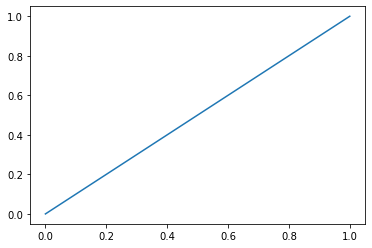

In [10]:
import numpy 

def c(n,x):
    y = 0 
    for j in range(n):
        if j ==0:
            if 0 <= x.all()  <= 1:
                y = x
            else:
                y =0
        else:
            if 0 <=x<=1/3:
                y = y+0.5*c(j-1,3*x)
            elif 2/3 <=x<=1:
                y = y +0.5+0.5*c(j-1,3*x-2)
            elif 1/3 < x<1/2:
                y = 0.5
            else:
                y =0
    return y

import matplotlib.pyplot as plt
x = numpy.linspace(0.0,1.0,1000)
y = c(1,x)
plt.plot(x,y)
plt.show()


In [7]:
def calPoints(self, ops: List[str]) -> int:
    x = []
    for i in ops:
        if i == 'C':
            del x[-1]
        elif i == 'D':
            x.append(int(x[-1])*2)
        elif i == '+':
            x.append(int(x[-1])+int(x[-2]))
        else:
            x.append(int(i))

    return(sum(x))



0


In [65]:
nums = [-1]

def summaryRanges(nums):
    if not nums:    return []
    nums += [nums[-1]+100]
    res = []
    s = nums[0]

    for i in range(len(nums)):
        if nums[i] - 1 > nums[i-1]:
            if s == nums[i-1]:
                res.append(str(s))
            else:
                res.append(str(s)+'->'+str(nums[i-1]))
            s = nums[i]

    return res
summaryRanges(nums)

['-1']

In [57]:
def summaryRanges(nums):
    if not nums:
        return []
    
    nums = nums + [nums[-1]+2]
    print(nums)
    res = []
    head = nums[0]
    for i in range(1,len(nums)):
        if nums[i] - nums[i-1] > 1:
            if head == nums[i-1]:
                res.append(str(head))
            else:
                res.append(str(head) + "->" + str(nums[i-1]))
            head = nums[i]
    return res
print(summaryRanges([-1]))

[-1, 1]
['-1']


In [ ]:
def summaryRanges(nums):
    ranges = []
    for n in nums:
        if not ranges or n > ranges[-1][-1] + 1:
            ranges += [],
        ranges[-1][1:] = n,
    return ['->'.join(map(str, r)) for r in ranges]

In [ ]:
def summaryRanges(nums):
    ranges, r = [], []
    for n in nums:
        if n-1 not in r:
            r = []
            ranges += r,
        r[1:] = n,
    return ['->'.join(map(str, r)) for r in ranges]

In [ ]:
def summaryRanges(nums):

    start = 0
    end = 0

    result = []

    while start < len(nums) and end<len(nums):

        if end+1 < len(nums) and nums[end]+1 == nums[end+1]:
            end=end+1

        else:
            if start == end:
                result.append(str(nums[start]))
                start = start + 1
                end = end + 1
            else:
                result.append(str(nums[start])+'->'+str(nums[end]))
                start = end + 1
                end = end + 1

    return result

In [46]:
nums = [1,4,3,2,8,5]
if len(nums) == 2:
    print(min(nums))
s = nums[0]
#x = nums[1:]
for i in range(1,len(nums)):
    rst = nums[:i]+nums[i+1:]
    print((s,nums[i]),list(zip(rst[1::2],rst[2::2])))
    
    


(1, 4) [(3, 2), (8, 5)]
(1, 3) [(4, 2), (8, 5)]
(1, 2) [(4, 3), (8, 5)]
(1, 8) [(4, 3), (2, 5)]
(1, 5) [(4, 3), (2, 8)]


In [57]:
def arrayPairSum(nums):
    v = 0
    nums.sort()
    v+= nums[::2]
    return v


In [66]:
nums = [2,7,11,15]
target = 9
holder = {}
for i,j in enumerate(nums):
    x = [holder.values]
    if target - j in x:
        print ([i,holder.keys])
    else:
        holder.update({i:j})
    print(holder)

{0: 2}
{0: 2, 1: 7}
{0: 2, 1: 7, 2: 11}
{0: 2, 1: 7, 2: 11, 3: 15}


In [2]:
a = [1, 0, 1, 0, 0, 0, 0, 1]

for i,j in enumerate(a):
    if j == 1:
        print('index',i,':',j)

index 0 : 1
index 2 : 1
index 7 : 1


In [13]:
nums = [5,0,1,2,3,4]

ans = [nums[i] for i in nums]
print(ans)

[4, 5, 0, 1, 2, 3]


In [14]:
def buildArray(nums):
        
    for i in range(len(nums)):
        nums[i] += len(nums) * (nums[nums[i]] % len(nums))
        
    for i in range(len(nums)):      
        nums[i] //= len(nums)
            
    return nums
nums = [5,0,1,2,3,4]
buildArray(nums)

[4, 5, 0, 1, 2, 3]

In [38]:
import math
def maximumProduct(nums):
    nums.sort(reverse=True)
    return max(math.prod(nums[:3]),nums[0]*nums[-1]*nums[-2])


print(maximumProduct([1,2,3]))
print(maximumProduct([1,2,3,4]))
print(maximumProduct([-1,-2,-3]))
print(maximumProduct([-90,-2182,-12,12,12,0]))
print(maximumProduct([1,1,1,1]))
print(maximumProduct([-1,-1,-1,1]))
print(maximumProduct([0,0,0]))
print(maximumProduct([-21,-12,21,32]))
print(maximumProduct([-710,-107,-851,657,-14,-859,278,-182,-749,718,-640,127,-930,-462,694,969,143,309,904,-651,160,451,-159,-316,844,-60,611,-169,-73,721,-902,338,-20,-890,-819,-644,107,404,150,-219,459,-324,-385,-118,-307,993,202,-147,62,-94,-976,-329,689,870,532,-686,371,-850,-186,87,878,989,-822,-350,-948,-412,161,-88,-509,836,-207,-60,771,516,-287,-366,-512,509,904,-459,683,-563,-766,-837,-333,93,893,303,908,532,-206,990,280,826,-13,115,-732,525,-939,-787]))


6
24
-6
2356560
1
1
0
8064
972256230


In [87]:
def findPoisonedDuration(timeSeries, duration):
    res = 0
    for i in range(1,len(timeSeries)):
        if timeSeries[i] - timeSeries[i-1] < duration:
            res += timeSeries[i] - timeSeries[i-1]
        else:
            res+=duration
    return res+duration
print(findPoisonedDuration([1,2],2))
print(findPoisonedDuration([1,4],2))
print(findPoisonedDuration([1,2,3,4],5))
print(findPoisonedDuration([0],0))
print(findPoisonedDuration([1],5))
print(findPoisonedDuration([0],1))
print(findPoisonedDuration([1,2,7,8],4))
print(findPoisonedDuration([1,4,8],10))
print(findPoisonedDuration([1,4,5,8,45,76,78,78],10))

3
4
8
0
5
1
10
17
39


In [98]:
def countPoints(points, queries):
    res = []
    for circle in queries:
        total = 0
        for point in points:
            if math.sqrt(((point[0]-circle[0])**2)+((point[1]-circle[1])**2)) <= circle[2]: total+=1
        res.append(total)
    return res
points = [[1,1],[2,2],[3,3],[4,4],[5,5]]
queries = [[1,2,2],[2,2,2],[4,3,2],[4,3,3]]
countPoints(points,queries)

[2, 3, 2, 4]

In [14]:
def lengthOfLongestSubstring(s):
    last_seen = {}
    l=0
    max_length=0
    for r in range(len(s)):
        if s[r] in last_seen:
            l=max(last_seen[s[r]], l)
        
        last_seen[s[r]]=r+1
        max_length=max(max_length, r-l+1)
    return max_length
print(lengthOfLongestSubstring("abcabcbb"))
print(lengthOfLongestSubstring("bbbbb"))
print(lengthOfLongestSubstring("pwwkew"))
print(lengthOfLongestSubstring("dvdf"))
print(lengthOfLongestSubstring(""))
print(lengthOfLongestSubstring("1a1tuow9n*& a2mx)"))
print(lengthOfLongestSubstring("11111eeeee      "))
print(lengthOfLongestSubstring(' '))
print(lengthOfLongestSubstring('abcaacbbbcbassbac'))

3
1
3
3
0
15
2
1
4


In [16]:
# My solution below outputs the correct results here and on a different PC
# But the same exact code (+class) outputs a different result on LC
def lengthOfLongestSubstring(s):
    t = 0 
    cnt = 0
    dict = {}
    
    for i in range(len(s)):
        if s[i] not in dict.values():
            dict.update({i:s[i]})
            cnt+=1
        else:
            if cnt > t: t=cnt
            for j,v in list(dict.items()):
                if v!= s[i]:
                    dict.pop(j,None)
                else:
                    dict.pop(j,None)
                    break
            dict.update({i:s[i]})
            cnt = len(dict)
    if cnt>t:t=cnt
    return t
print(lengthOfLongestSubstring("abcabcbb"))
print(lengthOfLongestSubstring("bbbbb"))
print(lengthOfLongestSubstring("pwwkew"))
print(lengthOfLongestSubstring("dvdf"))
print(lengthOfLongestSubstring(""))
print(lengthOfLongestSubstring("wsslpluuwekuaxt"))
print(lengthOfLongestSubstring("1a1tuow9n*& a2mx)"))
print(lengthOfLongestSubstring("11111eeeee      "))
print(lengthOfLongestSubstring(' '))
print(lengthOfLongestSubstring('abcaacbbbcbassbac'))
print(lengthOfLongestSubstring(' s s s dfd asd'))

3
1
3
3
0
7
15
2
1
4
5


In [10]:

def findLengthOfLCIS(nums):
    """
    :type nums: List[int]
    :rtype: int
    """
    if len(nums) == 1: return 1
    maxVal = 0 
    cnt = 1 
    holder  = [nums[0]]
    for i in range(1,len(nums)):
        if nums[i] > nums[i-1]:
            holder.append(nums[i])
            cnt += 1
        else:
            if cnt > maxVal: maxVal = cnt
            cnt = 1
            holder = [nums[i]]
    if cnt > maxVal: maxVal = cnt
    return maxVal

In [11]:
def findMaxAverage(nums, k):
    n = 0
    t = 0
    x = float('-inf')
    for i in range(len(nums)):
        t += nums[i]
        if i >= k-1: 
            x = max(x, t/k)
            t -= nums[n]
            n += 1
    return x
        

In [13]:
def findMaxAverage(nums, k):
    res = []
    for i in range(k-1,len(nums)):
        print(i)
        #x = nums[i-(k-1):i+1]
        #res.append(float(sum(x))/float(len(x)))
    #return max(res)
nums = [1,12,-5,-6,50,3]
k = 4

res = []
for i in range(k-1,len(nums)):
    x = nums[i-(k-1):i+1]
    print(i,k-1,x)
    
    
    #print(findMaxAverage(nums,k))

3 3 [1, 12, -5, -6]
4 3 [12, -5, -6, 50]
5 3 [-5, -6, 50, 3]
